In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import sys,dateutil.parser


import macd1
import pandas.io.data as web
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#PAIR='XETHZUSD_1440'
#PAIR='XXBTZUSD_10080'
PAIR='XXBTZUSD_1440'


('/XETHZUSD_10080', '2015-08-13 00:00:00', 57)
('/XETHZUSD_1440', '2015-08-08 00:00:00', 404)
('/XETHZUSD_15', '2016-09-08 15:45:00', 710)
('/XETHZUSD_240', '2016-05-19 08:00:00', 718)
('/XETHZUSD_30', '2016-09-01 04:00:00', 717)
('/XETHZUSD_5', '2016-09-13 15:30:00', 583)
('/XETHZUSD_60', '2016-08-17 05:00:00', 718)
('/XLTCZUSD_10080', '2013-10-31 00:00:00', 149)
('/XLTCZUSD_1440', '2014-09-29 00:00:00', 654)
('/XLTCZUSD_15', '2016-09-08 16:15:00', 504)
('/XLTCZUSD_240', '2016-05-19 08:00:00', 711)
('/XLTCZUSD_30', '2016-09-01 04:00:00', 656)
('/XLTCZUSD_5', '2016-09-13 15:30:00', 347)
('/XLTCZUSD_60', '2016-08-17 05:00:00', 718)
('/XXBTZUSD_10080', '2013-10-10 00:00:00', 153)
('/XXBTZUSD_1440', '2014-09-29 00:00:00', 718)
('/XXBTZUSD_15', '2016-09-08 15:45:00', 718)
('/XXBTZUSD_240', '2016-05-19 08:00:00', 718)
('/XXBTZUSD_30', '2016-09-01 04:00:00', 718)
('/XXBTZUSD_5', '2016-09-13 15:30:00', 718)
('/XXBTZUSD_60', '2016-08-17 05:00:00', 718)


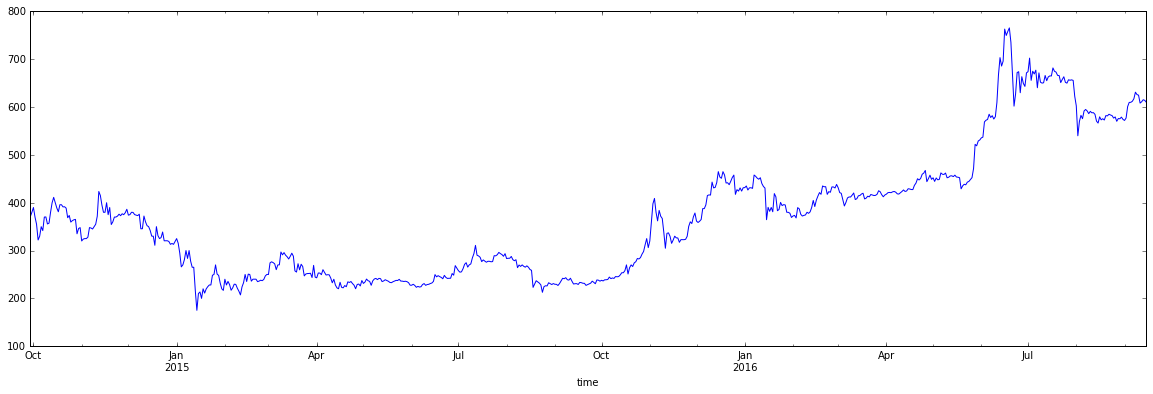

In [2]:

#simple price plot
filename='source/kraken.h5'
h5 = pd.HDFStore(filename, 'r')
#print (h5['XETHZUSD_1440']['high'].astype(float))
#print(h5)
rcParams['figure.figsize'] = 20, 6
h5[PAIR]['close'].astype(float).plot()
for k in h5.keys():
    l=len(h5[k].index)
    print(k,str(h5[k].index[0]),l)





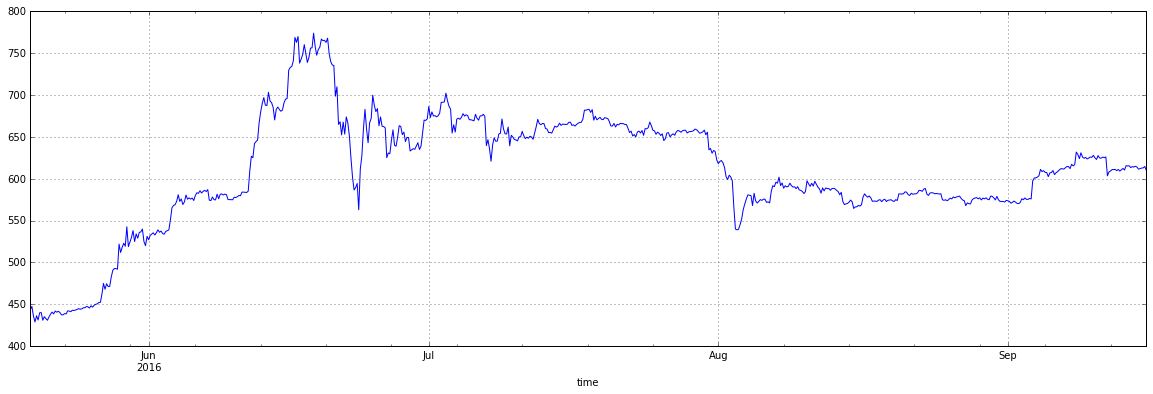

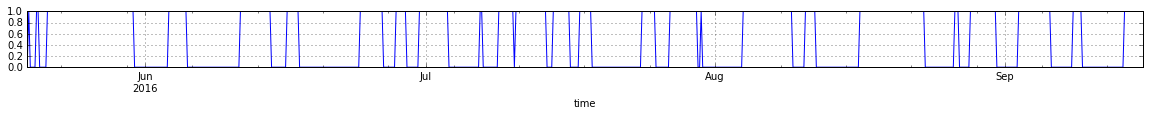

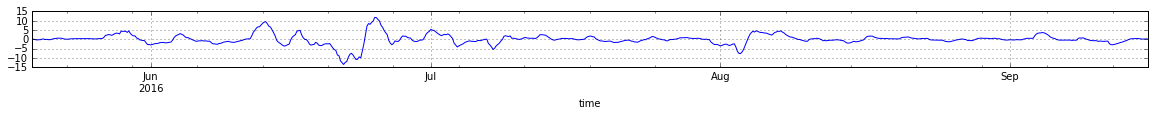

In [3]:
# macd and regime
PAIR='XXBTZUSD_240'
FROM = '2010-08-08 00:00:00.000000'
TO = '2017-10-28 00:00:00.000000'
filename='source/kraken.h5'
h5 = pd.HDFStore(filename, 'r')
rcParams['figure.figsize'] = 20, 6
df=h5[PAIR]
dtSlice = df.ix[dateutil.parser.parse(FROM):dateutil.parser.parse(TO)]
dt = macd1.compMacd(dtSlice,macd1.compTradeDmacdNoShort)
fig, axs1 = plt.subplots(1,1)
dt['close'].astype(float).plot(ax=axs1, grid=True)

figsize2=(20, 1)
fig, axs2 = plt.subplots(1,1)
dt['regime'].plot(ax=axs2,figsize=figsize2, grid=True)

figsize3=(20, 1)
fig, axs3 = plt.subplots(1,1)
dt['dmacd'].plot(ax=axs3,figsize=figsize3, grid=True)


In [4]:
#comparison between market and strategy
filename='source/kraken.h5'
h5 = pd.HDFStore(filename, 'r')
def compTradeForPeriod(h5,pair,ix_from,ix_to):
    df=h5[pair]
    dtSlice = df.ix[ix_from:ix_to]
    dt = macd1.compMacd(dtSlice,macd1.compTradeDmacdNoShort)
    dcumsum = dt[['market','strategy']].cumsum() 
    lpos=len(dcumsum)-1
    strat=np.exp(dcumsum['strategy'][lpos])
    bhold=np.exp(dcumsum['market'][lpos])
    return(bhold,strat,strat/bhold if bhold >0 else 0.0)
#def getRandomRange(n,date)
def plotTrageRange(h5,pair,start,width):
    df=h5[pair]
    ll=len(df.index)
    w=width
    lll=min(ll,ll-start-w)
    print(PAIR+' width: '+str(w)+' start: '+str(start)+' end: '+str(start+lll))

    a=np.ndarray(shape=(lll), dtype=float)
    b=np.ndarray(shape=(lll), dtype=float)
    c=np.ndarray(shape=(lll), dtype=float)
    for i in range(0,lll):
        j=start+i
        a[i]=(compTradeForPeriod(h5,pair,df.index[j],df.index[j+w]))[2]
        c[i]=(compTradeForPeriod(h5,pair,df.index[j],df.index[j+w]))[1]
        b[i]=(compTradeForPeriod(h5,pair,df.index[j],df.index[j+w]))[0]

    dd={'bh':b,'strat':c,'ratio: ':a}
    df1=pd.DataFrame(data=dd,index=df.index[start:start+lll])    
    df1.plot()
    

XXBTZUSD_240 width: 288 start: 0 end: 430


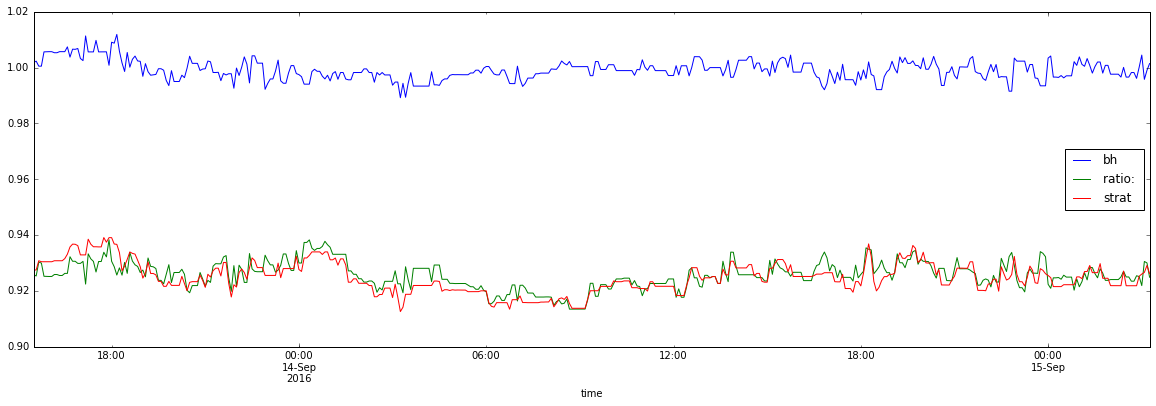

In [5]:
plotTrageRange(h5,'XXBTZUSD_5',0,288)

XXBTZUSD_240 width: 96 start: 0 end: 622


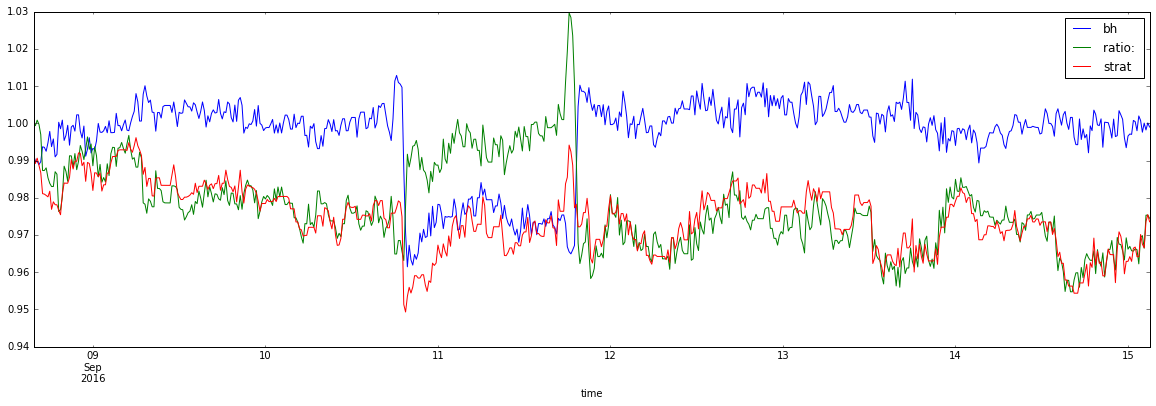

In [6]:
plotTrageRange(h5,'XXBTZUSD_15',0,96)

XXBTZUSD_240 width: 168 start: 0 end: 550


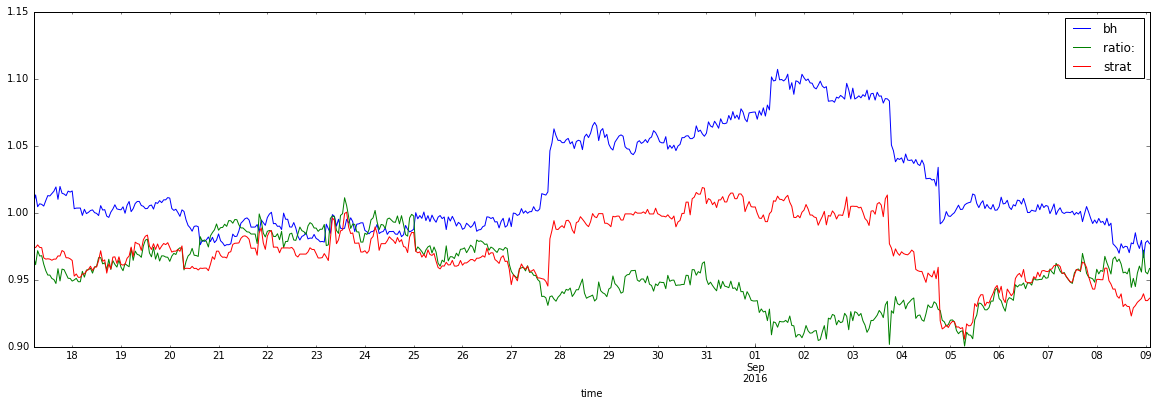

In [7]:
plotTrageRange(h5,'XXBTZUSD_60',0,168)

XXBTZUSD_240 width: 90 start: 0 end: 628


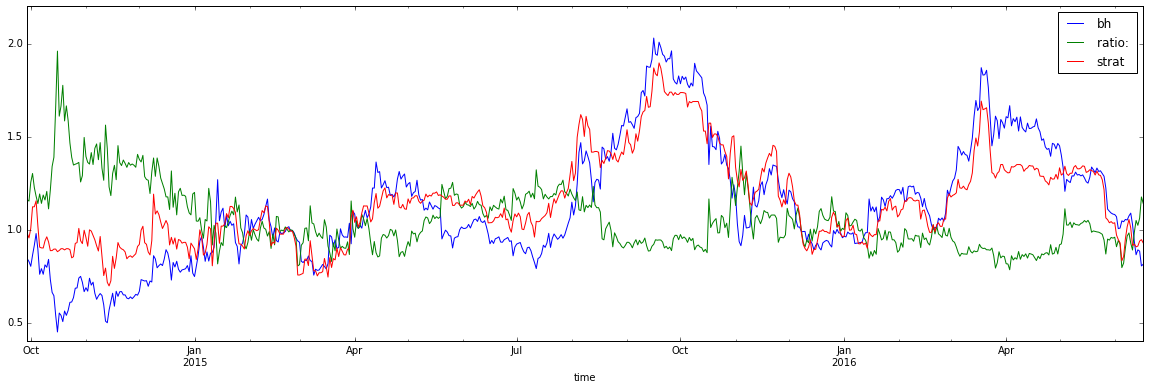

In [8]:

plotTrageRange(h5,'XXBTZUSD_1440',0,90)

XXBTZUSD_240 width: 180 start: 0 end: 538


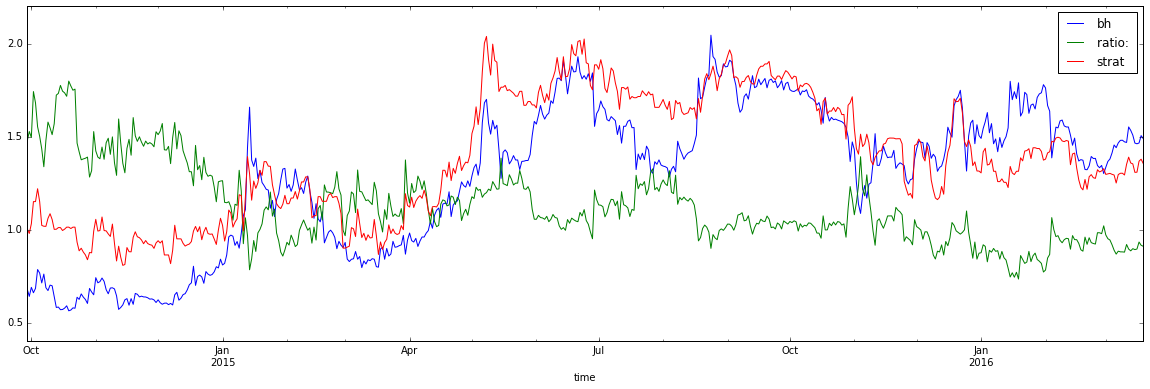

In [9]:
plotTrageRange(h5,'XXBTZUSD_1440',0,180)